In [1]:
import os
try:
    __IPYTHON__
    import sys
    del sys.argv[1:]
except:
    pass
import time 
%matplotlib inline 
import srwl_bl
import srwlib
import srwlpy
import uti_plot_com as srw_io
import srwl_uti_smp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_srw_file(filename):
    data, mode, ranges, labels, units = srw_io.file_load(filename)
    data = np.array(data).reshape((ranges[8], ranges[5]), order='C')
    '''
    return {'data': data,
            'shape': data.shape,
            'mean': np.mean(data),
            'photon_energy': ranges[0],
            'horizontal_extent': ranges[3:5],
            'vertical_extent': ranges[6:8],
            # 'mode': mode,
            'labels': labels,
            'units': units}
    '''
    return data 

In [3]:
def set_optics(v=None):
    el = []
    pp = []
    names = ['Elliptical_Cylinder', 'Elliptical_Cylinder_Elliptical_Cylinder2', 'Elliptical_Cylinder2', 'Elliptical_Cylinder2_Watchpoint', 'Watchpoint']
    for el_name in names:
        if el_name == 'Elliptical_Cylinder':
            # Elliptical_Cylinder: ellipsoidMirror 28.5m
            el.append(srwlib.SRWLOptMirEl(
                _p=v.op_Elliptical_Cylinder_p,
                _q=v.op_Elliptical_Cylinder_q,
                _ang_graz=v.op_Elliptical_Cylinder_ang,
                _size_tang=v.op_Elliptical_Cylinder_size_tang,
                _size_sag=v.op_Elliptical_Cylinder_size_sag,
                _nvx=v.op_Elliptical_Cylinder_nvx,
                _nvy=v.op_Elliptical_Cylinder_nvy,
                _nvz=v.op_Elliptical_Cylinder_nvz,
                _tvx=v.op_Elliptical_Cylinder_tvx,
                _tvy=v.op_Elliptical_Cylinder_tvy,
                _x=v.op_Elliptical_Cylinder_x,
                _y=v.op_Elliptical_Cylinder_y,
            ))
            pp.append(v.op_Elliptical_Cylinder_pp)

        elif el_name == 'Elliptical_Cylinder_Elliptical_Cylinder2':
            # Elliptical_Cylinder_Elliptical_Cylinder2: drift 28.5m
            el.append(srwlib.SRWLOptD(
                _L=v.op_Elliptical_Cylinder_Elliptical_Cylinder2_L,
            ))
            pp.append(v.op_Elliptical_Cylinder_Elliptical_Cylinder2_pp)
        elif el_name == 'Elliptical_Cylinder2':
            # Elliptical_Cylinder2: ellipsoidMirror 29.5m
            el.append(srwlib.SRWLOptMirEl(
                _p=v.op_Elliptical_Cylinder2_p,
                _q=v.op_Elliptical_Cylinder2_q,
                _ang_graz=v.op_Elliptical_Cylinder2_ang,
                _size_tang=v.op_Elliptical_Cylinder2_size_tang,
                _size_sag=v.op_Elliptical_Cylinder2_size_sag,
                _nvx=v.op_Elliptical_Cylinder2_nvx,
                _nvy=v.op_Elliptical_Cylinder2_nvy,
                _nvz=v.op_Elliptical_Cylinder2_nvz,
                _tvx=v.op_Elliptical_Cylinder2_tvx,
                _tvy=v.op_Elliptical_Cylinder2_tvy,
                _x=v.op_Elliptical_Cylinder2_x,
                _y=v.op_Elliptical_Cylinder2_y,
            ))
            pp.append(v.op_Elliptical_Cylinder2_pp)

        elif el_name == 'Elliptical_Cylinder2_Watchpoint':
            # Elliptical_Cylinder2_Watchpoint: drift 29.5m
            el.append(srwlib.SRWLOptD(
                _L=v.op_Elliptical_Cylinder2_Watchpoint_L,
            ))
            pp.append(v.op_Elliptical_Cylinder2_Watchpoint_pp)
        elif el_name == 'Watchpoint':
            # Watchpoint: watch 37.5m
            pass
    pp.append(v.op_fin_pp)
    return srwlib.SRWLOptC(el, pp)

In [4]:
varParam = srwl_bl.srwl_uti_ext_options([
    ['name', 's', 'kb01 with propagation parameters 3', 'simulation name'],

#---Data Folder
    ['fdir', 's', '', 'folder (directory) name for reading-in input and saving output data files'],


    ['gbm_x', 'f', 0.0, 'average horizontal coordinates of waist [m]'],
    ['gbm_y', 'f', 0.0, 'average vertical coordinates of waist [m]'],
    ['gbm_z', 'f', 0.0, 'average longitudinal coordinate of waist [m]'],
    ['gbm_xp', 'f', 0.0, 'average horizontal angle at waist [rad]'],
    ['gbm_yp', 'f', 0.0, 'average verical angle at waist [rad]'],
    ['gbm_ave', 'f', 1000.0, 'average photon energy [eV]'],
    ['gbm_pen', 'f', 0.001, 'energy per pulse [J]'],
    ['gbm_rep', 'f', 1, 'rep. rate [Hz]'],
    ['gbm_pol', 'f', 1, 'polarization 1- lin. hor., 2- lin. vert., 3- lin. 45 deg., 4- lin.135 deg., 5- circ. right, 6- circ. left'],
    ['gbm_sx', 'f', 4.4200000000000004e-05, 'rms beam size vs horizontal position [m] at waist (for intensity)'],
    ['gbm_sy', 'f', 2.385e-05, 'rms beam size vs vertical position [m] at waist (for intensity)'],
    ['gbm_st', 'f', 1e-13, 'rms pulse duration [s] (for intensity)'],
    ['gbm_mx', 'f', 0, 'transverse Gauss-Hermite mode order in horizontal direction'],
    ['gbm_my', 'f', 0, 'transverse Gauss-Hermite mode order in vertical direction'],
    ['gbm_ca', 's', 'c', 'treat _sigX, _sigY as sizes in [m] in coordinate representation (_presCA="c") or as angular divergences in [rad] in angular representation (_presCA="a")'],
    ['gbm_ft', 's', 't', 'treat _sigT as pulse duration in [s] in time domain/representation (_presFT="t") or as bandwidth in [eV] in frequency domain/representation (_presFT="f")'],

#---Calculation Types
    # Electron Trajectory
    ['tr', '', '', 'calculate electron trajectory', 'store_true'],
    ['tr_cti', 'f', 0.0, 'initial time moment (c*t) for electron trajectory calculation [m]'],
    ['tr_ctf', 'f', 0.0, 'final time moment (c*t) for electron trajectory calculation [m]'],
    ['tr_np', 'f', 10000, 'number of points for trajectory calculation'],
    ['tr_mag', 'i', 1, 'magnetic field to be used for trajectory calculation: 1- approximate, 2- accurate'],
    ['tr_fn', 's', 'res_trj.dat', 'file name for saving calculated trajectory data'],
    ['tr_pl', 's', '', 'plot the resulting trajectiry in graph(s): ""- dont plot, otherwise the string should list the trajectory components to plot'],

    #Single-Electron Spectrum vs Photon Energy
    ['ss', '', '', 'calculate single-e spectrum vs photon energy', 'store_true'],
    ['ss_ei', 'f', 100.0, 'initial photon energy [eV] for single-e spectrum vs photon energy calculation'],
    ['ss_ef', 'f', 20000.0, 'final photon energy [eV] for single-e spectrum vs photon energy calculation'],
    ['ss_ne', 'i', 10000, 'number of points vs photon energy for single-e spectrum vs photon energy calculation'],
    ['ss_x', 'f', 0.0, 'horizontal position [m] for single-e spectrum vs photon energy calculation'],
    ['ss_y', 'f', 0.0, 'vertical position [m] for single-e spectrum vs photon energy calculation'],
    ['ss_meth', 'i', 1, 'method to use for single-e spectrum vs photon energy calculation: 0- "manual", 1- "auto-undulator", 2- "auto-wiggler"'],
    ['ss_prec', 'f', 0.01, 'relative precision for single-e spectrum vs photon energy calculation (nominal value is 0.01)'],
    ['ss_pol', 'i', 6, 'polarization component to extract after spectrum vs photon energy calculation: 0- Linear Horizontal, 1- Linear Vertical, 2- Linear 45 degrees, 3- Linear 135 degrees, 4- Circular Right, 5- Circular Left, 6- Total'],
    ['ss_mag', 'i', 1, 'magnetic field to be used for single-e spectrum vs photon energy calculation: 1- approximate, 2- accurate'],
    ['ss_ft', 's', 'f', 'presentation/domain: "f"- frequency (photon energy), "t"- time'],
    ['ss_u', 'i', 1, 'electric field units: 0- arbitrary, 1- sqrt(Phot/s/0.1%bw/mm^2), 2- sqrt(J/eV/mm^2) or sqrt(W/mm^2), depending on representation (freq. or time)'],
    ['ss_fn', 's', 'res_spec_se.dat', 'file name for saving calculated single-e spectrum vs photon energy'],
    ['ss_pl', 's', '', 'plot the resulting single-e spectrum in a graph: ""- dont plot, "e"- show plot vs photon energy'],

    #Multi-Electron Spectrum vs Photon Energy (taking into account e-beam emittance, energy spread and collection aperture size)
    ['sm', '', '', 'calculate multi-e spectrum vs photon energy', 'store_true'],
    ['sm_ei', 'f', 100.0, 'initial photon energy [eV] for multi-e spectrum vs photon energy calculation'],
    ['sm_ef', 'f', 20000.0, 'final photon energy [eV] for multi-e spectrum vs photon energy calculation'],
    ['sm_ne', 'i', 10000, 'number of points vs photon energy for multi-e spectrum vs photon energy calculation'],
    ['sm_x', 'f', 0.0, 'horizontal center position [m] for multi-e spectrum vs photon energy calculation'],
    ['sm_rx', 'f', 0.001, 'range of horizontal position / horizontal aperture size [m] for multi-e spectrum vs photon energy calculation'],
    ['sm_nx', 'i', 1, 'number of points vs horizontal position for multi-e spectrum vs photon energy calculation'],
    ['sm_y', 'f', 0.0, 'vertical center position [m] for multi-e spectrum vs photon energy calculation'],
    ['sm_ry', 'f', 0.001, 'range of vertical position / vertical aperture size [m] for multi-e spectrum vs photon energy calculation'],
    ['sm_ny', 'i', 1, 'number of points vs vertical position for multi-e spectrum vs photon energy calculation'],
    ['sm_mag', 'i', 1, 'magnetic field to be used for calculation of multi-e spectrum spectrum or intensity distribution: 1- approximate, 2- accurate'],
    ['sm_hi', 'i', 1, 'initial UR spectral harmonic to be taken into account for multi-e spectrum vs photon energy calculation'],
    ['sm_hf', 'i', 15, 'final UR spectral harmonic to be taken into account for multi-e spectrum vs photon energy calculation'],
    ['sm_prl', 'f', 1.0, 'longitudinal integration precision parameter for multi-e spectrum vs photon energy calculation'],
    ['sm_pra', 'f', 1.0, 'azimuthal integration precision parameter for multi-e spectrum vs photon energy calculation'],
    ['sm_meth', 'i', -1, 'method to use for spectrum vs photon energy calculation in case of arbitrary input magnetic field: 0- "manual", 1- "auto-undulator", 2- "auto-wiggler", -1- dont use this accurate integration method (rather use approximate if possible)'],
    ['sm_prec', 'f', 0.01, 'relative precision for spectrum vs photon energy calculation in case of arbitrary input magnetic field (nominal value is 0.01)'],
    ['sm_nm', 'i', 1, 'number of macro-electrons for calculation of spectrum in case of arbitrary input magnetic field'],
    ['sm_na', 'i', 5, 'number of macro-electrons to average on each node at parallel (MPI-based) calculation of spectrum in case of arbitrary input magnetic field'],
    ['sm_ns', 'i', 5, 'saving periodicity (in terms of macro-electrons) for intermediate intensity at calculation of multi-electron spectrum in case of arbitrary input magnetic field'],
    ['sm_type', 'i', 1, 'calculate flux (=1) or flux per unit surface (=2)'],
    ['sm_pol', 'i', 6, 'polarization component to extract after calculation of multi-e flux or intensity: 0- Linear Horizontal, 1- Linear Vertical, 2- Linear 45 degrees, 3- Linear 135 degrees, 4- Circular Right, 5- Circular Left, 6- Total'],
    ['sm_rm', 'i', 1, 'method for generation of pseudo-random numbers for e-beam phase-space integration: 1- standard pseudo-random number generator, 2- Halton sequences, 3- LPtau sequences (to be implemented)'],
    ['sm_fn', 's', 'res_spec_me.dat', 'file name for saving calculated milti-e spectrum vs photon energy'],
    ['sm_pl', 's', '', 'plot the resulting spectrum-e spectrum in a graph: ""- dont plot, "e"- show plot vs photon energy'],
    #to add options for the multi-e calculation from "accurate" magnetic field

    #Power Density Distribution vs horizontal and vertical position
    ['pw', '', '', 'calculate SR power density distribution', 'store_true'],
    ['pw_x', 'f', 0.0, 'central horizontal position [m] for calculation of power density distribution vs horizontal and vertical position'],
    ['pw_rx', 'f', 0.015, 'range of horizontal position [m] for calculation of power density distribution vs horizontal and vertical position'],
    ['pw_nx', 'i', 100, 'number of points vs horizontal position for calculation of power density distribution'],
    ['pw_y', 'f', 0.0, 'central vertical position [m] for calculation of power density distribution vs horizontal and vertical position'],
    ['pw_ry', 'f', 0.015, 'range of vertical position [m] for calculation of power density distribution vs horizontal and vertical position'],
    ['pw_ny', 'i', 100, 'number of points vs vertical position for calculation of power density distribution'],
    ['pw_pr', 'f', 1.0, 'precision factor for calculation of power density distribution'],
    ['pw_meth', 'i', 1, 'power density computation method (1- "near field", 2- "far field")'],
    ['pw_zst', 'f', 0., 'initial longitudinal position along electron trajectory of power density distribution (effective if pow_sst < pow_sfi)'],
    ['pw_zfi', 'f', 0., 'final longitudinal position along electron trajectory of power density distribution (effective if pow_sst < pow_sfi)'],
    ['pw_mag', 'i', 1, 'magnetic field to be used for power density calculation: 1- approximate, 2- accurate'],
    ['pw_fn', 's', 'res_pow.dat', 'file name for saving calculated power density distribution'],
    ['pw_pl', 's', '', 'plot the resulting power density distribution in a graph: ""- dont plot, "x"- vs horizontal position, "y"- vs vertical position, "xy"- vs horizontal and vertical position'],

    #Single-Electron Intensity distribution vs horizontal and vertical position
    ['si', '', '', 'calculate single-e intensity distribution (without wavefront propagation through a beamline) vs horizontal and vertical position', 'store_true'],
    #Single-Electron Wavefront Propagation
    ['ws', '', '', 'calculate single-electron (/ fully coherent) wavefront propagation', 'store_true'],
    #Multi-Electron (partially-coherent) Wavefront Propagation
    ['wm', '', '', 'calculate multi-electron (/ partially coherent) wavefront propagation', 'store_true'],

    ['w_e', 'f', 1000.0, 'photon energy [eV] for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_ef', 'f', -1.0, 'final photon energy [eV] for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_ne', 'i', 1, 'number of points vs photon energy for calculation of intensity distribution'],
    ['w_x', 'f', 0.0, 'central horizontal position [m] for calculation of intensity distribution'],
    ['w_rx', 'f', 0.0009, 'range of horizontal position [m] for calculation of intensity distribution'],
    ['w_nx', 'i', 100, 'number of points vs horizontal position for calculation of intensity distribution'],
    ['w_y', 'f', 0.0, 'central vertical position [m] for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_ry', 'f', 0.0009, 'range of vertical position [m] for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_ny', 'i', 100, 'number of points vs vertical position for calculation of intensity distribution'],
    ['w_smpf', 'f', 4.0, 'sampling factor for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_meth', 'i', 2, 'method to use for calculation of intensity distribution vs horizontal and vertical position: 0- "manual", 1- "auto-undulator", 2- "auto-wiggler"'],
    ['w_prec', 'f', 0.01, 'relative precision for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_u', 'i', 1, 'electric field units: 0- arbitrary, 1- sqrt(Phot/s/0.1%bw/mm^2), 2- sqrt(J/eV/mm^2) or sqrt(W/mm^2), depending on representation (freq. or time)'],
    ['si_pol', 'i', 6, 'polarization component to extract after calculation of intensity distribution: 0- Linear Horizontal, 1- Linear Vertical, 2- Linear 45 degrees, 3- Linear 135 degrees, 4- Circular Right, 5- Circular Left, 6- Total'],
    ['si_type', 'i', 0, 'type of a characteristic to be extracted after calculation of intensity distribution: 0- Single-Electron Intensity, 1- Multi-Electron Intensity, 2- Single-Electron Flux, 3- Multi-Electron Flux, 4- Single-Electron Radiation Phase, 5- Re(E): Real part of Single-Electron Electric Field, 6- Im(E): Imaginary part of Single-Electron Electric Field, 7- Single-Electron Intensity, integrated over Time or Photon Energy'],
    ['w_mag', 'i', 1, 'magnetic field to be used for calculation of intensity distribution vs horizontal and vertical position: 1- approximate, 2- accurate'],

    ['si_fn', 's', 'res_int_se.dat', 'file name for saving calculated single-e intensity distribution (without wavefront propagation through a beamline) vs horizontal and vertical position'],
    ['si_pl', 's', '', 'plot the input intensity distributions in graph(s): ""- dont plot, "x"- vs horizontal position, "y"- vs vertical position, "xy"- vs horizontal and vertical position'],
    ['ws_fni', 's', 'res_int_pr_se.dat', 'file name for saving propagated single-e intensity distribution vs horizontal and vertical position'],
    ['ws_pl', 's', '', 'plot the resulting intensity distributions in graph(s): ""- dont plot, "x"- vs horizontal position, "y"- vs vertical position, "xy"- vs horizontal and vertical position'],

    ['wm_nm', 'i', 1000, 'number of macro-electrons (coherent wavefronts) for calculation of multi-electron wavefront propagation'],
    ['wm_na', 'i', 5, 'number of macro-electrons (coherent wavefronts) to average on each node for parallel (MPI-based) calculation of multi-electron wavefront propagation'],
    ['wm_ns', 'i', 5, 'saving periodicity (in terms of macro-electrons / coherent wavefronts) for intermediate intensity at multi-electron wavefront propagation calculation'],
    ['wm_ch', 'i', 0, 'type of a characteristic to be extracted after calculation of multi-electron wavefront propagation: #0- intensity (s0); 1- four Stokes components; 2- mutual intensity cut vs x; 3- mutual intensity cut vs y; 40- intensity(s0), mutual intensity cuts and degree of coherence vs X & Y'],
    ['wm_ap', 'i', 0, 'switch specifying representation of the resulting Stokes parameters: coordinate (0) or angular (1)'],
    ['wm_x0', 'f', 0, 'horizontal center position for mutual intensity cut calculation'],
    ['wm_y0', 'f', 0, 'vertical center position for mutual intensity cut calculation'],
    ['wm_ei', 'i', 0, 'integration over photon energy is required (1) or not (0); if the integration is required, the limits are taken from w_e, w_ef'],
    ['wm_rm', 'i', 1, 'method for generation of pseudo-random numbers for e-beam phase-space integration: 1- standard pseudo-random number generator, 2- Halton sequences, 3- LPtau sequences (to be implemented)'],
    ['wm_am', 'i', 0, 'multi-electron integration approximation method: 0- no approximation (use the standard 5D integration method), 1- integrate numerically only over e-beam energy spread and use convolution to treat transverse emittance'],
    ['wm_fni', 's', 'res_int_pr_me.dat', 'file name for saving propagated multi-e intensity distribution vs horizontal and vertical position'],

    #to add options
    ['op_r', 'f', 28.5, 'longitudinal position of the first optical element [m]'],

    # Former appParam:
    ['rs_type', 's', 'g', 'source type, (u) idealized undulator, (t), tabulated undulator, (m) multipole, (g) gaussian beam'],

#---Beamline optics:
    # Elliptical_Cylinder: ellipsoidMirror
    ['op_Elliptical_Cylinder_hfn', 's', '', 'heightProfileFile'],
    ['op_Elliptical_Cylinder_dim', 's', 'x', 'orientation'],
    ['op_Elliptical_Cylinder_p', 'f', 28.5, 'firstFocusLength'],
    ['op_Elliptical_Cylinder_q', 'f', 9.0, 'focalLength'],
    ['op_Elliptical_Cylinder_ang', 'f', 0.034941, 'grazingAngle'],
    ['op_Elliptical_Cylinder_amp_coef', 'f', 1.0, 'heightAmplification'],
    ['op_Elliptical_Cylinder_size_tang', 'f', 0.5, 'tangentialSize'],
    ['op_Elliptical_Cylinder_size_sag', 'f', 0.5, 'sagittalSize'],
    ['op_Elliptical_Cylinder_nvx', 'f', 0.999389625362475, 'normalVectorX'],
    ['op_Elliptical_Cylinder_nvy', 'f', 0.0, 'normalVectorY'],
    ['op_Elliptical_Cylinder_nvz', 'f', -0.03493389067727645, 'normalVectorZ'],
    ['op_Elliptical_Cylinder_tvx', 'f', -0.03493389067727645, 'tangentialVectorX'],
    ['op_Elliptical_Cylinder_tvy', 'f', 0.0, 'tangentialVectorY'],
    ['op_Elliptical_Cylinder_x', 'f', 0.0, 'horizontalOffset'],
    ['op_Elliptical_Cylinder_y', 'f', 0.0, 'verticalOffset'],

    # Elliptical_Cylinder_Elliptical_Cylinder2: drift
    ['op_Elliptical_Cylinder_Elliptical_Cylinder2_L', 'f', 1.0, 'length'],

    # Elliptical_Cylinder2: ellipsoidMirror
    ['op_Elliptical_Cylinder2_hfn', 's', '', 'heightProfileFile'],
    ['op_Elliptical_Cylinder2_dim', 's', 'x', 'orientation'],
    ['op_Elliptical_Cylinder2_p', 'f', 29.5, 'firstFocusLength'],
    ['op_Elliptical_Cylinder2_q', 'f', 8.0, 'focalLength'],
    ['op_Elliptical_Cylinder2_ang', 'f', 0.034941, 'grazingAngle'],
    ['op_Elliptical_Cylinder2_amp_coef', 'f', 1.0, 'heightAmplification'],
    ['op_Elliptical_Cylinder2_size_tang', 'f', 0.5, 'tangentialSize'],
    ['op_Elliptical_Cylinder2_size_sag', 'f', 0.5, 'sagittalSize'],
    ['op_Elliptical_Cylinder2_nvx', 'f', 0.0, 'normalVectorX'],
    ['op_Elliptical_Cylinder2_nvy', 'f', 0.999389625362475, 'normalVectorY'],
    ['op_Elliptical_Cylinder2_nvz', 'f', -0.03493389067727645, 'normalVectorZ'],
    ['op_Elliptical_Cylinder2_tvx', 'f', 0.0, 'tangentialVectorX'],
    ['op_Elliptical_Cylinder2_tvy', 'f', 0.03493389067727645, 'tangentialVectorY'],
    ['op_Elliptical_Cylinder2_x', 'f', 0.0, 'horizontalOffset'],
    ['op_Elliptical_Cylinder2_y', 'f', 0.0, 'verticalOffset'],

    # Elliptical_Cylinder2_Watchpoint: drift
    ['op_Elliptical_Cylinder2_Watchpoint_L', 'f', 8.0, 'length'],

#---Propagation parameters
    ['op_Elliptical_Cylinder_pp', 'f',                      [0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Elliptical_Cylinder'],
    ['op_Elliptical_Cylinder_Elliptical_Cylinder2_pp', 'f', [0, 0, 1.0, 1, 0, 1.0, 2.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Elliptical_Cylinder_Elliptical_Cylinder2'],
    ['op_Elliptical_Cylinder2_pp', 'f',                     [0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Elliptical_Cylinder2'],
    ['op_Elliptical_Cylinder2_Watchpoint_pp', 'f',          [0, 0, 1.0, 1, 0, 1.0, 2.5, 1.0, 2.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Elliptical_Cylinder2_Watchpoint'],
    ['op_fin_pp', 'f',                                      [0, 0, 1.0, 0, 0, 0.125, 1.0, 0.085, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'final post-propagation (resize) parameters'],

    #[ 0]: Auto-Resize (1) or not (0) Before propagation
    #[ 1]: Auto-Resize (1) or not (0) After propagation
    #[ 2]: Relative Precision for propagation with Auto-Resizing (1. is nominal)
    #[ 3]: Allow (1) or not (0) for semi-analytical treatment of the quadratic (leading) phase terms at the propagation
    #[ 4]: Do any Resizing on Fourier side, using FFT, (1) or not (0)
    #[ 5]: Horizontal Range modification factor at Resizing (1. means no modification)
    #[ 6]: Horizontal Resolution modification factor at Resizing
    #[ 7]: Vertical Range modification factor at Resizing
    #[ 8]: Vertical Resolution modification factor at Resizing
    #[ 9]: Type of wavefront Shift before Resizing (not yet implemented)
    #[10]: New Horizontal wavefront Center position after Shift (not yet implemented)
    #[11]: New Vertical wavefront Center position after Shift (not yet implemented)
    #[12]: Optional: Orientation of the Output Optical Axis vector in the Incident Beam Frame: Horizontal Coordinate
    #[13]: Optional: Orientation of the Output Optical Axis vector in the Incident Beam Frame: Vertical Coordinate
    #[14]: Optional: Orientation of the Output Optical Axis vector in the Incident Beam Frame: Longitudinal Coordinate
    #[15]: Optional: Orientation of the Horizontal Base vector of the Output Frame in the Incident Beam Frame: Horizontal Coordinate
    #[16]: Optional: Orientation of the Horizontal Base vector of the Output Frame in the Incident Beam Frame: Vertical Coordinate
])



In [5]:
def find_idxs(varParam):
    file_idx = varParam.index(['ws_fni', 's', 'res_int_pr_se.dat', 'file name for saving propagated single-e intensity distribution vs horizontal and vertical position'])
    vertical_idx = varParam.index(['op_Elliptical_Cylinder2_y', 'f',0, 'verticalOffset'])
    horizontal_idx = varParam.index(['op_Elliptical_Cylinder2_x', 'f', 0.0, 'horizontalOffset'])
    print(vertical_idx)
    print(horizontal_idx)
    print(file_idx)
    return file_idx, vertical_idx, horizontal_idx

In [6]:
file_idx, vertical_idx, horizontal_idx = find_idxs(varParam)

276
275
197


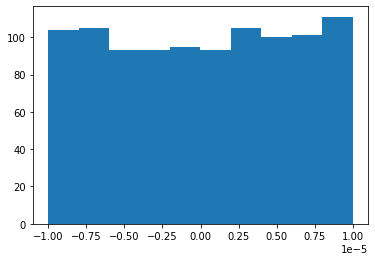

In [7]:
n_runs = 1000
zx_min = -1e-5
zx_max = 1e-5
offz1_vals = np.random.uniform(zx_min, zx_max, n_runs)
offz2_vals = np.random.uniform(zx_min, zx_max, n_runs)
plt.hist(offz1_vals)
plt.show()

In [8]:
start = time.time()
beam_arrays = [] 
for i in range(n_runs):
    if i % 100 == 0:
        print('run number ' + str(i))
    horizontalOffset = offz1_vals[i]
    verticalOffset = offz2_vals[i]
    varParam[horizontal_idx][2] = horizontalOffset
    varParam[vertical_idx][2] = verticalOffset
    save_dat = 'dat_files/res_int_pr_se_' + str(i) + '.dat'
    varParam[file_idx][2] = save_dat
    
    #print(varParam[273])
    #print(varParam[274])
    #print(varParam[192])
  
    v = srwl_bl.srwl_uti_parse_options(varParam, use_sys_argv=True)
    
    op = set_optics(v)
    v.si = True
    v.si_pl = 'xy'
    v.ws = True
    v.ws_pl = 'xy'
    v.si_pl = ''
    v.ws_pl = ''
    mag = None
  
    if v.rs_type == 'm':
        mag = srwlib.SRWLMagFldC()
        mag.arXc.append(0)
        mag.arYc.append(0)
        mag.arMagFld.append(srwlib.SRWLMagFldM(v.mp_field, v.mp_order, v.mp_distribution, v.mp_len))
        mag.arZc.append(v.mp_zc)
    srwl_bl.SRWLBeamline(_name=v.name, _mag_approx=mag).calc_all(v, op)
    
    beam = read_srw_file(save_dat)
    print(beam.shape)
    h = beam.shape[0]
    w = beam.shape[1]
    beam_arrays.append(beam.reshape(1, h, w))
  
end = time.time()
print('time to run ' + str(n_runs) + ' simulations :' + str(np.round((start - end)/60, 4)) + ' minutes')
offsets = np.concatenate([offz1_vals.reshape(n_runs, 1), offz2_vals.reshape(n_runs, 1)], axis=1)
np.save('offsets_' + str(n_runs) + 'runs.npy', offsets)

beams_all = np.concatenate(beam_arrays, axis=0)
print(beams_all.shape)
np.save('beam_intensities_' + str(n_runs) + 'runs.npy', beams_all)


run number 0
Gaussian beam electric field calculation ... completed (lasted 0.007 s)
Extracting intensity and saving it to a file ... completed (lasted 0.021 s)
Propagation ... completed (lasted 0.338 s)
Saving Propagation Results ... completed (lasted 0.009 s)
(48, 70)
Gaussian beam electric field calculation ... completed (lasted 0.006 s)
Extracting intensity and saving it to a file ... completed (lasted 0.02 s)
Propagation ... completed (lasted 0.322 s)
Saving Propagation Results ... completed (lasted 0.009 s)
(48, 70)
Gaussian beam electric field calculation ... completed (lasted 0.007 s)
Extracting intensity and saving it to a file ... completed (lasted 0.02 s)
Propagation ... completed (lasted 0.322 s)
Saving Propagation Results ... completed (lasted 0.008 s)
(48, 70)
Gaussian beam electric field calculation ... completed (lasted 0.007 s)
Extracting intensity and saving it to a file ... completed (lasted 0.021 s)
Propagation ... completed (lasted 0.337 s)
Saving Propagation Resul

In [12]:
np.array_equal(beams_all[0],beams_all[1])

False

In [13]:
beams_all[0].shape

(48, 70)

1.309243470774272e+18


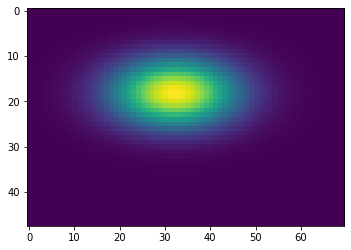

1.311110853835096e+18


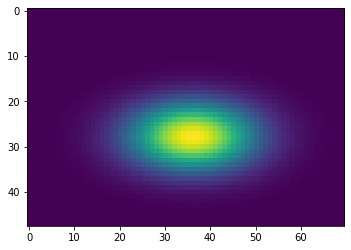

1.3035779622342492e+18


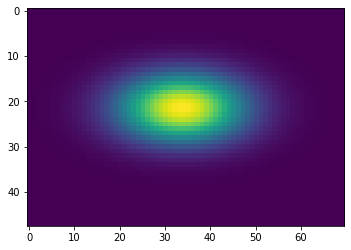

1.3091494625300972e+18


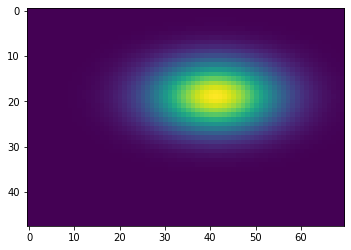

1.3075370287279636e+18


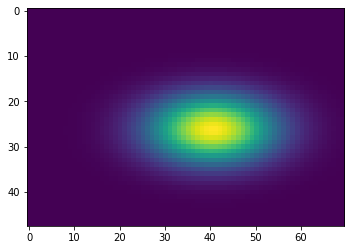

1.3063990341932155e+18


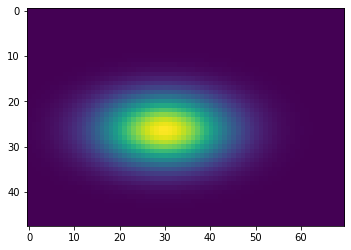

1.3040841498998866e+18


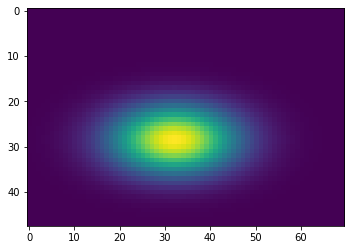

1.3026649552663347e+18


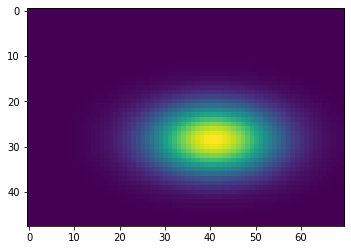

1.308745529445843e+18


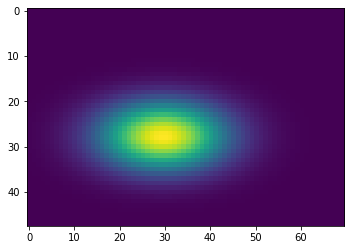

1.3090950367045222e+18


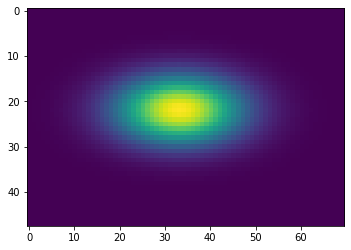

In [14]:
for i in range(10):
    plt.imshow(beams_all[i])
    print(np.max(beams_all[i]))
    plt.show()